**This project was made for gathering insights from the Titanic dataset, applying Feature Engineering, splitting and scaling the data, and Comparing many different Machine Learning models on it**

In [ ]:
!pip install scikit-optimize

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/train.csv')

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Data Visualization**

In [ ]:
#Visualization to understand data
df = pd.concat([df_train, df_test], ignore_index=True)

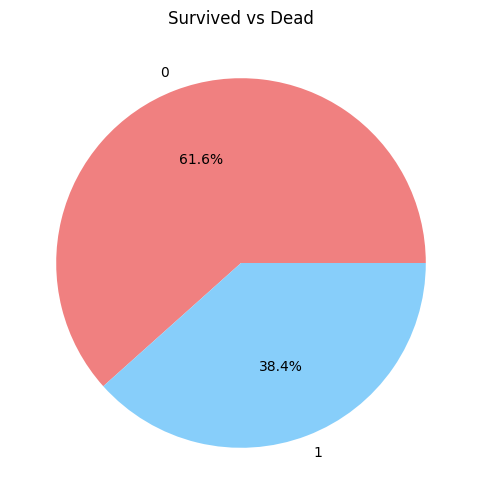

In [ ]:
# 1) Visualization of Survived (1) vs Dead (0) using Pie Chart
plt.figure(figsize=(8, 6))
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Survived vs Dead')
plt.ylabel('')
plt.show()

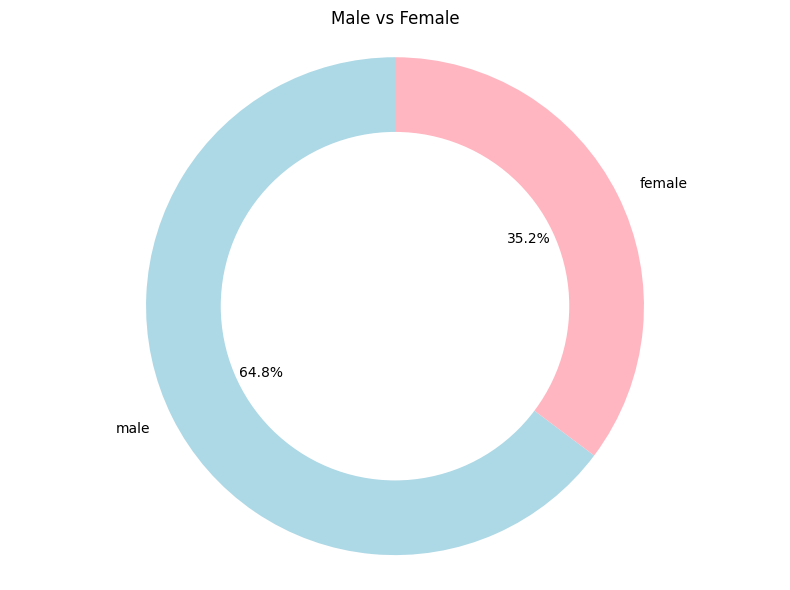

In [ ]:
# 2) Visualization of Male vs Female using Donut Chart
plt.figure(figsize=(8, 6))
sizes = df['Sex'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
# Draw a white circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Male vs Female')
plt.axis('equal')
plt.tight_layout()
plt.show()

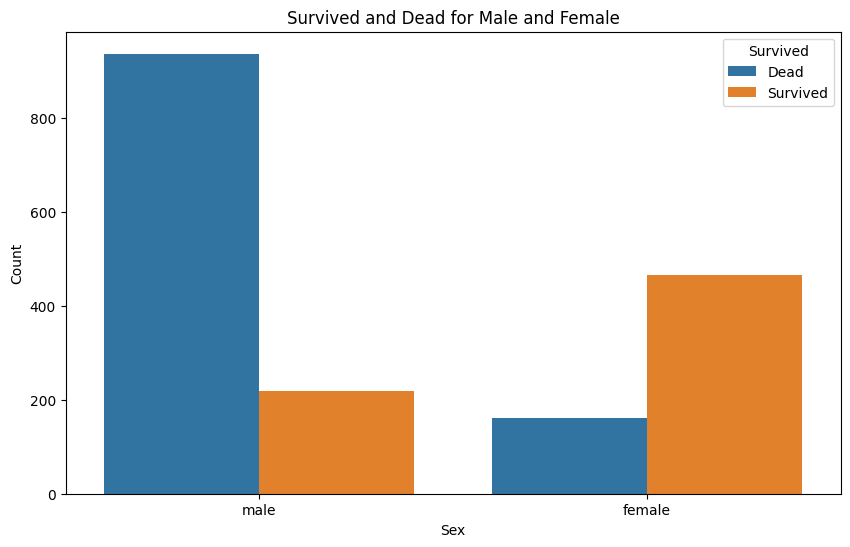

In [ ]:
# 3) Visualization of Survived Male and Female, Dead Male and Female
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survived and Dead for Male and Female')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Dead', 'Survived'])
plt.show()

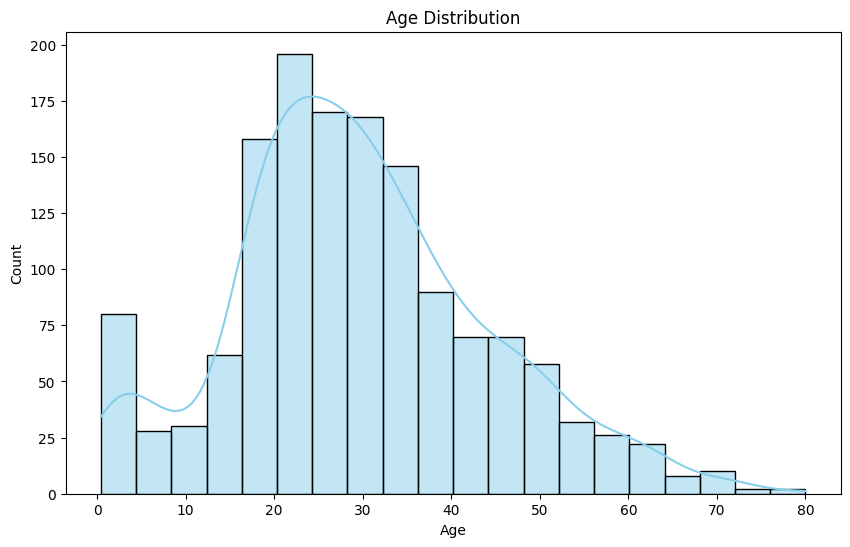

In [ ]:
# 4) Visualization of Age Distribution using Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-258-33a2998aad95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set2')


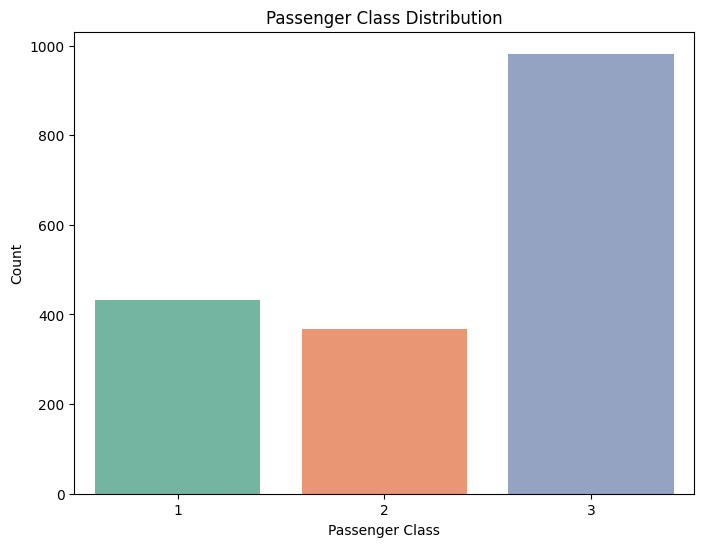

In [ ]:
# 5) Visualization of Passenger Class Distribution using Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df, palette='Set2')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

<ipython-input-259-ee5fd59e4602>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df, palette='muted')


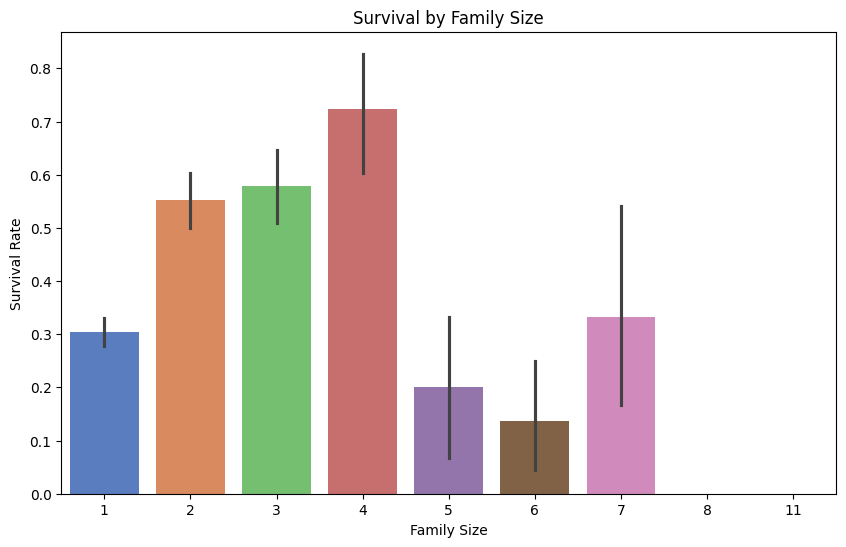

In [ ]:
# Creating a new feature 'Family Size'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 3) Visualization of Survival by Family Size using Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df, palette='muted')
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

# **Feature Engineering**

In [ ]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

In [ ]:
print("Null values:")
print(df_train.isnull().sum())

Null values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# New feature merging 2 existing features
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

# Removing those 2 features
df_train = df_train.drop(['SibSp','Parch'], axis=1)
df_test = df_test.drop(['SibSp','Parch'], axis=1)

# Drop columns that are irrelevant for Training
df_train = df_train.drop(columns=["PassengerId",'Name','Ticket'])
df_test = df_test.drop(columns=["PassengerId",'Name','Ticket'])

# Dropping duplicates
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

# indicator to whether the cabin value was given or not
df_train.loc[:, 'Cabin'] = df_train["Cabin"].notnull().astype('int')
df_test.loc[:, 'Cabin'] = df_test["Cabin"].notnull().astype('int')

# Replace NaN values with the most repeated value in Embarked
df_train.loc[:, 'Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_test.loc[:, 'Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])

In [ ]:
# sort the ages into logical categories
df_train["Age"] = df_train["Age"].fillna(-0.5)
df_test["Age"] = df_test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df_train.loc[:, 'AgeGroup'] = pd.cut(df_train["Age"], bins, labels=labels)
df_test.loc[:, 'AgeGroup'] = pd.cut(df_test["Age"], bins, labels=labels)

df_train.drop(columns=['Age'], inplace=True)
df_test.drop(columns=['Age'], inplace=True)

# Define custom encoding mapping
agegroup_mapping = {'Unknown': 0, 'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}

# Map custom encoding to AgeGroup column
df_train.loc[:, 'AgeGroup'] = df_train['AgeGroup'].map(agegroup_mapping)
df_test.loc[:, 'AgeGroup'] = df_test['AgeGroup'].map(agegroup_mapping)

# Encode categorical 'Sex" variables (One-Hot) as 0 and 1
df_train = pd.get_dummies(df_train, columns=['Sex'], dtype=int)
df_test = pd.get_dummies(df_test, columns=['Sex'], dtype=int)

In [ ]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df_train['Embarked'] = df_train['Embarked'].map(embarked_mapping)
df_test['Embarked'] = df_test['Embarked'].map(embarked_mapping)

In [ ]:
df_train

,Survived,Pclass,Fare,Cabin,Embarked,FamilySize,AgeGroup,Sex_female,Sex_male
0,0,3,7.2500,0,1,2,4,0,1
1,1,1,71.2833,1,2,2,6,1,0
2,1,3,7.9250,0,1,1,5,1,0
3,1,1,53.1000,1,1,2,5,1,0
4,0,3,8.0500,0,1,1,5,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,29.1250,0,3,6,6,1,0
887,1,1,30.0000,1,1,1,4,1,0
888,0,3,23.4500,0,1,4,0,1,0
889,1,1,30.0000,1,2,1,5,0,1


In [ ]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']
X_test = df_test.drop('Survived', axis=1)
y_test = df_test['Survived']

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

# StandardScaler
# scaler = StandardScaler()

# MinMaxScaler
# scaler = MinMaxScaler()

# RobustScaler
# scaler = RobustScaler()

# MaxAbsScaler
scaler = MaxAbsScaler()

# Replace original data with scaled data
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

# **Decision Tree and Random Forest**




In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Initialize and train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9566326530612245


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regression model
dt_reg_model = DecisionTreeRegressor(random_state=42)
dt_reg_model.fit(X_train, y_train)

# Make predictions on the test set
dt_reg_predictions = dt_reg_model.predict(X_test)

# Evaluate the Decision Tree Regression model
dt_reg_accuracy = dt_reg_model.score(X_test, y_test)
print("Decision Tree Regression Accuracy:", dt_reg_accuracy)


Decision Tree Regression Accuracy: 0.8879897203772478


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9566326530612245


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regression model
rf_reg_model = RandomForestRegressor(random_state=42)
rf_reg_model.fit(X_train, y_train)

# Make predictions on the test set
rf_reg_predictions = rf_reg_model.predict(X_test)

# Evaluate the Random Forest Regression model
rf_reg_accuracy = rf_reg_model.score(X_test, y_test)
print("Random Forest Regression Accuracy:", rf_reg_accuracy)


Random Forest Regression Accuracy: 0.8255102543837419


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize and train the Extra Trees Classifier model
extra_trees_classifier = ExtraTreesClassifier(random_state=42)
extra_trees_classifier.fit(X_train, y_train)

# Make predictions on the test set
extra_trees_predictions = extra_trees_classifier.predict(X_test)

# Evaluate the Extra Trees Classifier model
extra_trees_accuracy = accuracy_score(y_test, extra_trees_predictions)
print("Extra Trees Classifier Accuracy:", extra_trees_accuracy)

Extra Trees Classifier Accuracy: 0.9566326530612245


# **SVM**

In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_classifier = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_classifier.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine Accuracy:", svm_accuracy)

Support Vector Machine Accuracy: 0.8073979591836735


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Initialize and train the SVR model with RBF kernel
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# Make predictions on the test set
svr_predictions = svr.predict(X_test)

# Evaluate the SVR model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, svr_predictions)
print("SVR Mean Squared Error:", mse)

SVR Mean Squared Error: 0.15007896264551376


# **Other Classifiers**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
nb_predictions = nb_classifier.predict(X_test)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.764030612244898


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_classifier.predict(X_test)

# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

K-Nearest Neighbors Accuracy: 0.8507653061224489


# **Other Regressors**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model with increased max_iter
log_reg_classifier = LogisticRegression(random_state=42, max_iter=1000)
log_reg_classifier.fit(X_train, y_train)

# Make predictions on the test set
log_reg_predictions = log_reg_classifier.predict(X_test)

# Evaluate the Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.7767857142857143


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
linear_reg_classifier = LinearRegression()
linear_reg_classifier.fit(X_train, y_train)

# Make predictions on the test set
linear_reg_predictions = linear_reg_classifier.predict(X_test)

# Convert predicted probabilities to binary predictions (0 or 1)
linear_reg_predictions = np.where(linear_reg_predictions >= 0.5, 1, 0)

# Evaluate the Linear Regression model
linear_reg_accuracy = accuracy_score(y_test, linear_reg_predictions)
print("Linear Regression Accuracy:", linear_reg_accuracy)

Linear Regression Accuracy: 0.7755102040816326


# **Clustering**

In [ ]:
from sklearn.cluster import KMeans

# Initialize and train the K-means clustering model
kmeans_model = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans_model.fit(X_train)

# Make predictions on the test set
kmeans_predictions = kmeans_model.predict(X_test)

# Note: Since clustering is unsupervised, there are no labels to compare predictions with.

# Evaluate the K-means model (if ground truth labels are available)
kmeans_accuracy = accuracy_score(y_test, kmeans_predictions)
print("K-means Clustering Accuracy:", kmeans_accuracy)

K-means Clustering Accuracy: 0.7678571428571429


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Initialize and train the Hierarchical Clustering model
hierarchical_clustering = AgglomerativeClustering(n_clusters=3)  # Specify the number of clusters
cluster_labels = hierarchical_clustering.fit_predict(X_train)  # Assuming X_train is your data

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_train, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5228487844119813


In [ ]:
from sklearn.mixture import GaussianMixture

# Initialize and train the Gaussian Mixture Models (GMM) model
gmm = GaussianMixture(n_components=3)  # Specify the number of clusters
cluster_labels = gmm.fit_predict(X_train)  # Assuming X_train is your data

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_train, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5110860408457668


# **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the GBM model
gbm_classifier = GradientBoostingClassifier(random_state=42)
gbm_classifier.fit(X_train, y_train)

# Make predictions on the test set
gbm_predictions = gbm_classifier.predict(X_test)

# Evaluate the GBM model
gbm_accuracy = accuracy_score(y_test, gbm_predictions)
print("Gradient Boosting Machine Accuracy:", gbm_accuracy)

Gradient Boosting Machine Accuracy: 0.8660714285714286


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regression model
gb_reg_model = GradientBoostingRegressor(random_state=42)
gb_reg_model.fit(X_train, y_train)

# Make predictions on the test set
gb_reg_predictions = gb_reg_model.predict(X_test)

# Evaluate the Gradient Boosting Regression model
gb_reg_accuracy = gb_reg_model.score(X_test, y_test)
print("Gradient Boosting Regression Accuracy:", gb_reg_accuracy)

Gradient Boosting Regression Accuracy: 0.5783871903401494


# **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train the AdaBoost Classifier model
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
adaboost_predictions = adaboost_classifier.predict(X_test)

# Evaluate the AdaBoost Classifier model
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Classifier Accuracy:", adaboost_accuracy)

AdaBoost Classifier Accuracy: 0.8099489795918368


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the AdaBoost Regressor model
adaboost_regressor = AdaBoostRegressor(random_state=42)
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the test set
adaboost_predictions = adaboost_regressor.predict(X_test)

# Evaluate the AdaBoost Regressor model
adaboost_mse = mean_squared_error(y_test, adaboost_predictions)
print("AdaBoost Regressor Mean Squared Error:", adaboost_mse)

AdaBoost Regressor Mean Squared Error: 0.14700683607490536


# **Regularized Linear Models**

In [ ]:
from sklearn.linear_model import Lasso

# Initialize and train the Lasso Regression model
lasso_reg_model = Lasso(alpha=0.6, random_state=42)
lasso_reg_model.fit(X_train, y_train)

# Make predictions on the test set
lasso_reg_predictions = lasso_reg_model.predict(X_test)

# Evaluate the Lasso Regression model
lasso_reg_accuracy = lasso_reg_model.score(X_test, y_test)
print("Lasso Regression Accuracy:", lasso_reg_accuracy)

Lasso Regression Accuracy: 0.0


In [ ]:
from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model
ridge_reg_model = Ridge(alpha=1.0, random_state=42)
ridge_reg_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_reg_predictions = ridge_reg_model.predict(X_test)

# Evaluate the Ridge Regression model
ridge_reg_accuracy = ridge_reg_model.score(X_test, y_test)
print("Ridge Regression Accuracy:", ridge_reg_accuracy)

Ridge Regression Accuracy: 0.3588515476074807


In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and train the ElasticNet model
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elasticnet_model.fit(X_train, y_train)

# Make predictions on the test set
elasticnet_predictions = elasticnet_model.predict(X_test)

# Evaluate the ElasticNet model
elasticnet_accuracy = elasticnet_model.score(X_test, y_test)
print("ElasticNet Accuracy:", elasticnet_accuracy)

ElasticNet Accuracy: 0.2227999759267184


# **Simple Neural Network**

In [ ]:
from sklearn.linear_model import Perceptron

# Initialize and train the Perceptron model
perceptron_classifier = Perceptron(random_state=42)
perceptron_classifier.fit(X_train, y_train)

# Make predictions on the test set
perceptron_predictions = perceptron_classifier.predict(X_test)

# Evaluate the Perceptron model
perceptron_accuracy = accuracy_score(y_test, perceptron_predictions)
print("Perceptron Accuracy:", perceptron_accuracy)

Perceptron Accuracy: 0.4362244897959184


In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the MLPClassifier model with increased max_iter
mlp_classifier = MLPClassifier(max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test set
mlp_predictions = mlp_classifier.predict(X_test)

# Evaluate the MLPClassifier model
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print("MLPClassifier Accuracy:", mlp_accuracy)

MLPClassifier Accuracy: 0.8086734693877551


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the MLPRegressor model
mlp_regressor = MLPRegressor(random_state=42)
mlp_regressor.fit(X_train, y_train)

# Make predictions on the test set
mlp_predictions = mlp_regressor.predict(X_test)

# Evaluate the MLPRegressor model
mlp_mse = mean_squared_error(y_test, mlp_predictions)
print("MLPRegressor Mean Squared Error:", mlp_mse)

MLPRegressor Mean Squared Error: 0.13827261281007736
